In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

columns_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing data.csv', sep = ',', names = columns_name, encoding='ISO-8859-1')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


En este dataset sobre inmuebles destinados para el habitaje en Boston en los años setenta disponemos de diversas características que pueden afectar a su valor medio de mercado ('MEDV').

Algunas de las columnas hacen referencia a la localización del inmueble, como por ejemplo si se encuentra cerca del río o no ('CHAS'), la distancia a zonas con concentración para ser empleado ('DIS'), la proporción destinada a residencias ('ZN'), así como la destinada a negocios de venta al por mayor ('INDUS'), también el índice de accesibilidad a una autopista radial ('RAD') o inclusive la calidad del aire al medir la concentración de óxido nítrico ('NOX').

Por otro lado, también tenemos características socio-económicas, como la cantidad de impuestos asociados al inmueble ('TAX'), el porcentaje de la población con estatus socio-económico bajo ('LSTAT'), el ratio de alumnos por maestro ('PTRATIO'), la proporción de propietarios que todavía habitan el inmueble contruido antes de 1940 ('AGE') o el índice de criminalidad ('CRIM').

Finalmente, también se nos proporciona con detalles sobre el inmueble mismo, como el número de habitaciones habitables ('RM').

Para proceder con el primer ejercicio y crear el primer modelo de regresión, consultamos la correlación entre las diferentes variables:

<Axes: >

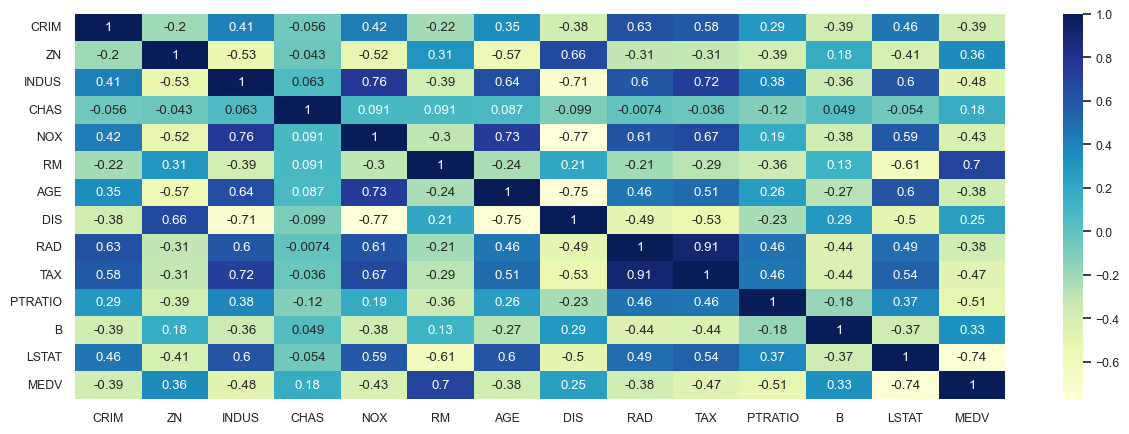

In [119]:
plt.figure(figsize=(15,5))
sns.set(font_scale=0.8)

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Vemos que para poder predecir el valor medio ('MEDV') la variable con el mayor grado de correlación es el porcentaje de la población de bajo estatus socio-económico ('LSTAT'), por lo que en este caso 'MEDV' será nuestra variable dependiente y 'LSTAT' la independiente.

Por el momento, dado que queremos ver cómo varía nuestra predicción en función de transformaciónes, modelos de validación o parámetros, empezamos a trabajar sin ningúna de estas herramientas.

En primer lugar definimos nuestra variable dependiente e independiente, para después aplicar una regresión lineal simple y evaluarla como modelo predictivo:

In [120]:
X_simple = df.iloc[:, -2:-1] #df['LSTAT']
y_simple = df.iloc[:, -1:] #df.['MEDV']

In [121]:
from sklearn.linear_model import LinearRegression

model_simple = LinearRegression().fit(X_simple, y_simple)

model_simple_score = model_simple.score(X_simple, y_simple)

print('Puntuación regresión lineal simple:', model_simple_score)

Puntuación regresión lineal simple: 0.5441462975864799


In [122]:
Y_simple_pred = model_simple.predict(X_simple)

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Regresión lineal simple coeficiente de codeterminación R2:', r2_score(y_simple, Y_simple_pred))
print('Regresión lineal simple error cuadrático medio MSE:', mean_squared_error(y_simple, Y_simple_pred))

Regresión lineal simple coeficiente de codeterminación R2: 0.5441462975864799
Regresión lineal simple error cuadrático medio MSE: 38.48296722989414


El modelo no es muy preciso, ya que el coeficiente de codeterminación 'R2' es muy bajo y el error cuadrático medio 'MSE' muy alto, por lo que nos encontramos con un modelo 'underfitted'.

De esta manera, podemos tratar de mejorar esta predicción al incluir más variables en un modelo de regresión lineal múltiple. Para ello, escogemos las siguientes dos variables con más codeterminación con el valor medio ('MEDV') que hacen referencia al número de habitaciones ('RM'), como también al ratio de alumnos por cada profesor ('PTRATIO').

In [124]:
X_multiple = df.iloc[:, [-2, 5, -4]] #df.['LSTAT', 'RM', 'PTRATIO']
y_multiple = df.iloc[:, -1:] #df.['MEDV']

In [125]:
model_multiple = LinearRegression().fit(X_multiple, y_multiple)

model_multiple_score = model_multiple.score(X_multiple, y_multiple)

print('Puntuación regresión lineal múltiple:', model_multiple_score)

Puntuación regresión lineal múltiple: 0.6786241601613112


In [126]:
Y_multiple_pred = model_multiple.predict(X_multiple)

print('Regresión lineal múltiple coeficiente de codeterminación R2:', r2_score(y_multiple, Y_multiple_pred))
print('Regresión lineal múltiple error cuadrático medio MSE:', mean_squared_error(y_multiple, Y_multiple_pred))

Regresión lineal múltiple coeficiente de codeterminación R2: 0.6786241601613112
Regresión lineal múltiple error cuadrático medio MSE: 27.13040575849706


Hemos conseguido mayor precisión añadiendo estas nuevas variables.

Por otro lado, también podemos tratar de mejorar el modelo al escalar sus datos. Para saber qué tipo de transformación es la más adecuada consultamos la distribución de los datos gráficamente.

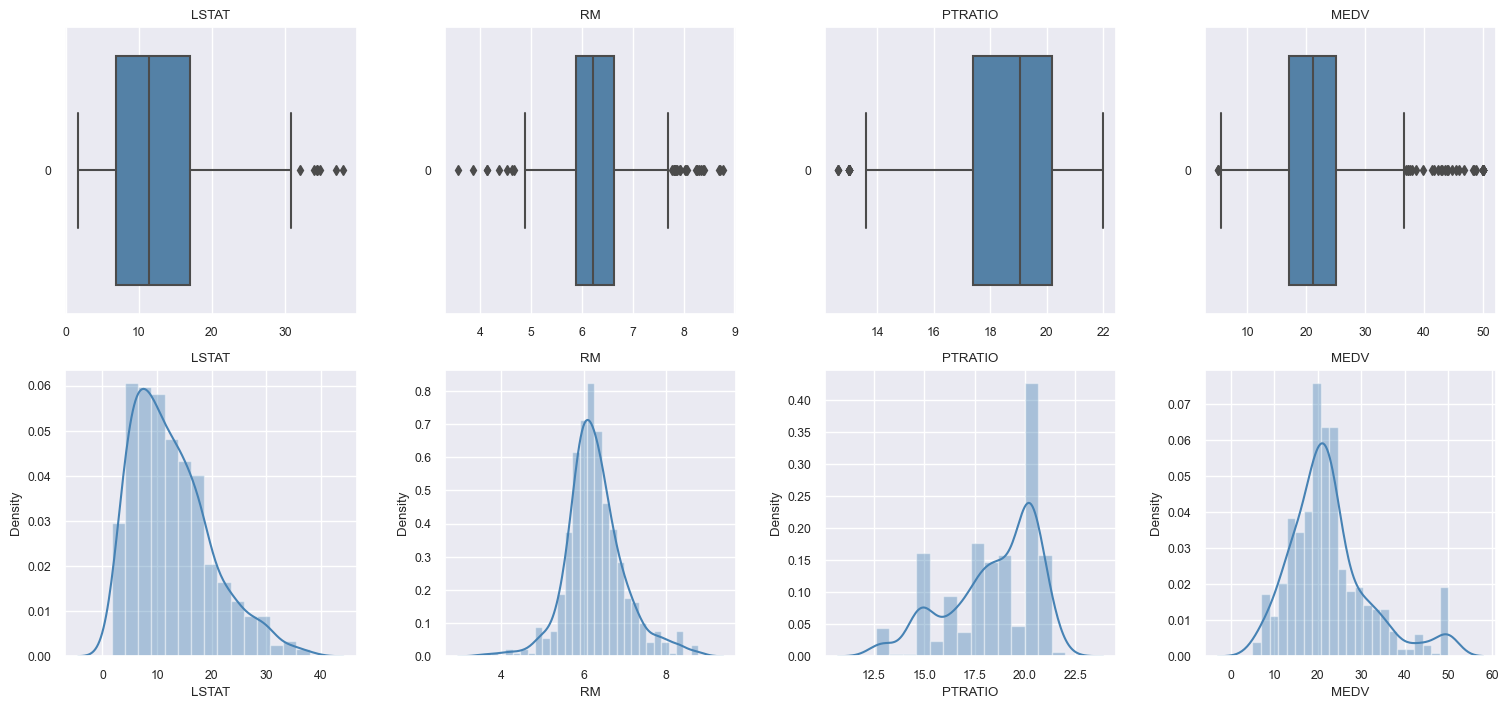

In [127]:
fig = plt.figure(figsize=(15,7))
sns.set(font_scale=0.8)

fig.add_subplot(2, 4, 1)
sns.boxplot(df.LSTAT, color='steelblue', orient='h')
plt.title('LSTAT')

fig.add_subplot(2, 4, 5)
sns.distplot(df.LSTAT, color='steelblue')
plt.title('LSTAT')

fig.add_subplot(2, 4, 2)
sns.boxplot(df.RM, color='steelblue', orient='h')
plt.title('RM')

fig.add_subplot(2, 4, 6)
sns.distplot(df.RM, color='steelblue')
plt.title('RM')

fig.add_subplot(2, 4, 3)
sns.boxplot(df.PTRATIO, color='steelblue', orient='h')
plt.title('PTRATIO')

fig.add_subplot(2, 4, 7)
sns.distplot(df.PTRATIO, color='steelblue')
plt.title('PTRATIO')

fig.add_subplot(2, 4, 4)
sns.boxplot(df.MEDV, color='steelblue', orient='h')
plt.title('MEDV')

fig.add_subplot(2, 4, 8)
sns.distplot(df.MEDV, color='steelblue')
plt.title('MEDV')

plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1)

En este caso, dado que las distribuciones de las variables no son gaussianas y también disponen de registros outliers, la transformación del tipo RobustScaler parece la más indicada, ya que éste maneja tanto los outliers como la oblicuidad de la distribución de los datos.

Procedemos a transformar los datos, así como a generar un nuevo modelo predictivo y a evaluarlo.

In [128]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_multiple_scaled = scaler.fit_transform(X_multiple.values)
y_multiple_scaled = scaler.fit_transform(y_multiple.values)

In [129]:
model_multiple_scaled = LinearRegression().fit(X_multiple_scaled, y_multiple_scaled)

model_multiple_scaled_score = model_multiple_scaled.score(X_multiple_scaled, y_multiple_scaled)

print('Puntuación regresión lineal simple:', model_multiple_score)
print('Puntuación regresión lineal simple escalado:', model_multiple_scaled_score)

Puntuación regresión lineal simple: 0.6786241601613112
Puntuación regresión lineal simple escalado: 0.678624160161311


Parece ser que no hay mejora, por lo que procedemos sin la escalación de los datos.

Acto seguido, podemos tratar de mejorar la puntuación de la predicción al consultar los parámetros que acepta el modelo de regresión lineal.

In [130]:
model_multiple_scaled.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Vemos que no hay muchos parámetros aceptados por la regresión lineal. Disponemos de 'copy_X' que realiza una copia de X, también el 'n_jobs', que sirve para acelerar la computación de los datos, así como 'positive' que convierte los datos negativos en positivos. Finalmente 'fit_intercept' asume una distribución centrada de los datos, por lo que no nos es de utilidad.

En consecuencia, si queremos mejorar la predicción con el uso de parámetros, parece ser que tenemos que aplicar un tercer modelo de regresión, como por ejemplo el Decision Tree Regressor.

In [131]:
from sklearn.tree import DecisionTreeRegressor

model_regtree = DecisionTreeRegressor().fit(X_multiple, y_multiple)

model_regtree_score = model_regtree.score(X_multiple, y_multiple)

print('Puntuación regression tree:', model_regtree_score)

Puntuación regression tree: 1.0


Ahora nos encontramos con que nuestro modelo está 'overfitted', ya que conoce la totalidad de los datos del dataset.

Para poder aplicar este modelo de regresión, por lo tanto, necesitamos separar el dataset en al menos dos partes, una parte para entrenar al modelo y otra para evaluarlo con resultados que no conoce.

Podemos empezar con una separación mediante la herramienta train_test_split()

In [132]:
from sklearn.model_selection import train_test_split

X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X_multiple, y_multiple,
                                                                       test_size = 0.3, random_state = 1)

print(X_multiple_train.shape, X_multiple_test.shape, y_multiple_train.shape, y_multiple_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [133]:
model_regtree = DecisionTreeRegressor().fit(X_multiple_train, y_multiple_train)

model_regtree_train_score = model_regtree.score(X_multiple_train, y_multiple_train)
model_regtree_test_score = model_regtree.score(X_multiple_test, y_multiple_test)

print('Puntuación regression tree train score:', model_regtree_train_score, 'Puntuación regression tree test score:', model_regtree_test_score)

Puntuación regression tree train score: 1.0 Puntuación regression tree test score: 0.6638383492344562


De nuevo vemos que para la parte 'train' obtenemos un resultado 'overfitted', pero sin embargo la parte 'test' nos da uno más adecuado.

Ya que este tipo de modelo de regresión acepta muchos parámetros para mejor la predicción, los ponemos en práctica para ver el resultado.

In [134]:
model_regtree_train_param = DecisionTreeRegressor(criterion='squared_error', max_depth = 5,
                                       min_samples_split = 10, random_state = 1).fit(X_multiple_train, y_multiple_train)

model_regtree_train_param_score = model_regtree_train_param.score(X_multiple_train, y_multiple_train)
model_regtree_test_param_score = model_regtree_train_param.score(X_multiple_test, y_multiple_test)

print('Puntuación regression tree train param score:', model_regtree_train_param_score, 'Puntuación regression tree train param score:', model_regtree_test_param_score)

Puntuación regression tree train param score: 0.8636343883804722 Puntuación regression tree train param score: 0.8608463832868235


Con estas variaciones obtenemos un gran resultado predictivo, sin embargo, podemos seguir haciendo comprobaciones y en lugar del tipo de validación train/test, podemos evaluar el modelo mediante la herramienta cross validation.

Por defecto, este método separa el dataset en 5 partes y entrena el modelo con 4 de las 5 secciones y utiliza la parte restante para testear el modelo. Este mismo procedimento lo repite en 5 ocasiones usando cada una de las 5 secciones como 'test' y el restante para entrenar el modelo, por lo que obtenemos 5 resultados distintos.

In [135]:
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeRegressor(criterion='squared_error', max_depth = 5,
                                       min_samples_split = 10, random_state = 1), X_multiple, y_multiple)

array([0.69057116, 0.77159882, 0.15286154, 0.39162153, 0.30181466])

Tras realizar esta validación vemos que nuestro modelo no es tan sólido como parecía, pues además de disminuir considerablemente su eficacia en sus mejores resultados, hasta en 3 de ellos se desempeña de manera insuficiente, por lo que no podríamos tomar decisiones en función del modelo obtenido.

Por último, podemos ver la importancia de la variables utilizadas para realizar predicciones y hacer un modelo sin la variable 'RM' que hace referencia al número de habitaciones.

In [136]:
X_multiple_RM = df.iloc[:, [-2, -4]] #df.['LSTAT', 'PTRATIO']
y_multiple_RM = df.iloc[:, -1:] #df.['MEDV']

In [137]:
cross_val_score(DecisionTreeRegressor(criterion='squared_error', max_depth = 5,
                                       min_samples_split = 10, random_state = 1), X_multiple_RM, y_multiple_RM)

array([ 0.4762241 ,  0.64469049, -0.02233614,  0.50923364,  0.41727899])

Al eliminar la variable la mayoría de resultados muestran un valor más similar, pero al mismo tiempo los mejores resultados se ven reducidos en eficacia.

Por el momento el modelo es insuficiente, por lo que habría que continuar trabajando en él para así obtener una mejor predicción.